<a href="https://colab.research.google.com/github/DaveClausell-AAEE/Proyectos-PY-IA/blob/main/P1_estados_emocionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Biométrico y Clasificación de Estados Emocionales con IA

## Introducción al Proyecto
Este proyecto surge de una investigación en el campo de las **Artes Electrónicas**, donde se explora la intersección entre la tecnología, la fisiología humana y los estímulos sensoriales. El objetivo principal es analizar cómo diferentes intervenciones externas (aromas y música) influyen en la respuesta al estrés y la recuperación emocional de los sujetos.

Utilizando un dataset propio con registros de **conductancia de la piel (GSR)**, tiempos de respuesta en **test neuropsicológicos (Stroop y TMT)** y escalas de **autopercepción subjetiva**, este desarrollo busca automatizar la interpretación de estados emocionales mediante el uso de Python e Inteligencia Artificial.

## Objetivos del Desarrollo
1.  **Ingeniería de Datos & Privacidad:** Procesamiento y anonimización de datos sensibles siguiendo estándares éticos de manejo de información personal (PII).
2.  **Análisis Exploratorio (EDA):** Visualización avanzada de la respuesta biométrica frente al estrés inducido.
3.  **Modelado Predictivo (Machine Learning):** Implementación de modelos de clasificación para identificar patrones de respuesta según el grupo experimental.

## Stack Tecnológico
* **Lenguaje:** Python 3.x
* **Análisis de Datos:** Pandas, NumPy
* **Visualización:** Seaborn, Matplotlib
* **Machine Learning:** Scikit-learn

---
*Desarrollado como parte de una transición profesional hacia el desarrollo remoto en Python e IA, integrando una sólida base en electrónica y docencia tecnológica.*

*Todos los datos se han anonimizado y los resultados son meramente experimentales y exploratorios. El fin es púramente educativo y carece de significancia estadística.*

# Fase 1: Limpieza y Anonimización de Datos (Data Privacy)
En este notebook realizo el pre-procesamiento de los datos obtenidos en mi investigación de Artes Electrónicas. El objetivo es eliminar cualquier identificador personal (PII) antes de proceder al análisis estadístico y modelado de IA, cumpliendo con estándares éticos de manejo de datos.

In [1]:
# ==============================================================================
# PROYECTO: Anonimización de datos biométricos y psicométricos
# OBJETIVO: Preparar el dataset para publicación en GitHub protegiendo la privacidad
# ==============================================================================

import pandas as pd
import numpy as np

# 1. Carga de datos
archivo_original = 'resultados_consolidados.csv'
df = pd.read_csv(archivo_original)

print(f"Dataset cargado: {len(df)} registros.")

# 2. Proceso de Anonimización
# Generamos una lista de IDs aleatorios únicos para reemplazar los originales
n_participantes = len(df['participantId'].unique())
ids_aleatorios = np.random.choice(range(1000, 9999), size=n_participantes, replace=False)

# Creamos un diccionario de mapeo {ID_antiguo: ID_nuevo}
mapping = dict(zip(df['participantId'].unique(), ids_aleatorios))

# Aplicamos el reemplazo
df['participantId'] = df['participantId'].map(mapping)

# 3. Renombramiento de columnas sensibles
# Cambiamos 'participantId' por algo más genérico
df.rename(columns={'participantId': 'id_sujeto'}, inplace=True)

# 4. Verificación
print("\nPrimeras 5 filas del dataset anonimizado:")
print(df[['id_sujeto', 'group', 'age']].head())

# 5. Exportación
# Guardamos la versión pública
df.to_csv('data_publica.csv', index=False)

print("\n[ÉXITO] El archivo 'data_publica.csv' ha sido generado y está listo para GitHub.")

Dataset cargado: 17 registros.

Primeras 5 filas del dataset anonimizado:
   id_sujeto        group  age
0       8691   Solo Aroma   28
1       1961   Solo Aroma   24
2       3717      Control   32
3       5999   Solo Aroma   23
4       9649  Solo Musica   23

[ÉXITO] El archivo 'data_publica.csv' ha sido generado y está listo para GitHub.


## Fase 2: Análisis Exploratorio de Datos (EDA)

En esta sección, visualizaremos los resultados del experimento para entender cómo los diferentes estímulos (Aroma, Música, o ambas) afectaron a los participantes. El análisis se centra en tres ejes:

1.  **Respuesta Fisiológica:** Comparación del cambio porcentual en la conductancia de la piel (GSR) tras la tarea estresante.
2.  **Evolución Subjetiva:** Seguimiento del nivel de activación (*Arousal*) reportado por los sujetos en las tres fases del estudio.
3.  **Correlaciones:** Identificación de vínculos entre la edad, el rendimiento cognitivo (Tests de Stroop y TMT) y la respuesta al estrés.

/tmp/ipython-input-3369725560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df, x='group', y='gsr_change_poststress', palette='magma', capsize=.1)


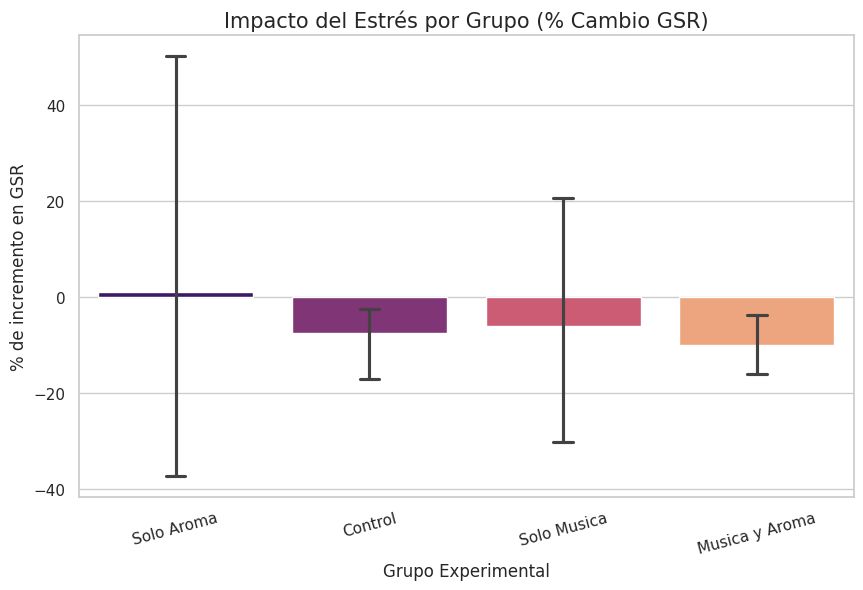

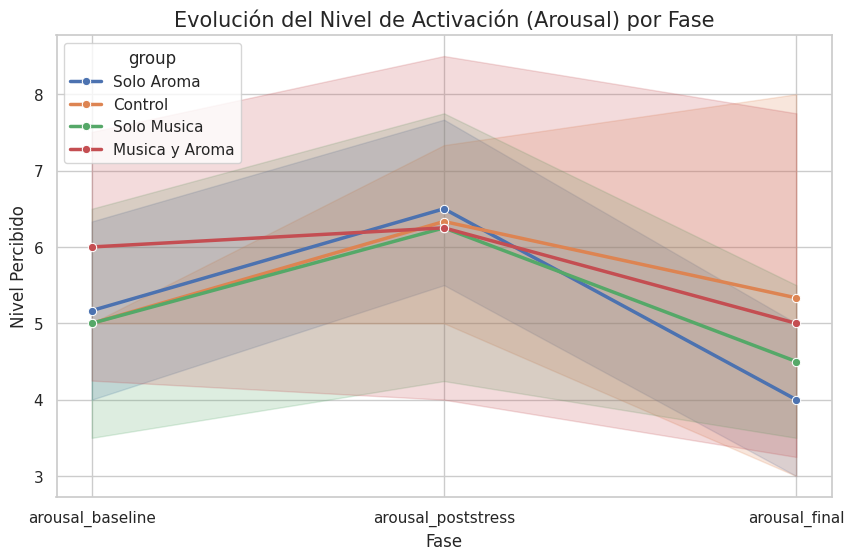

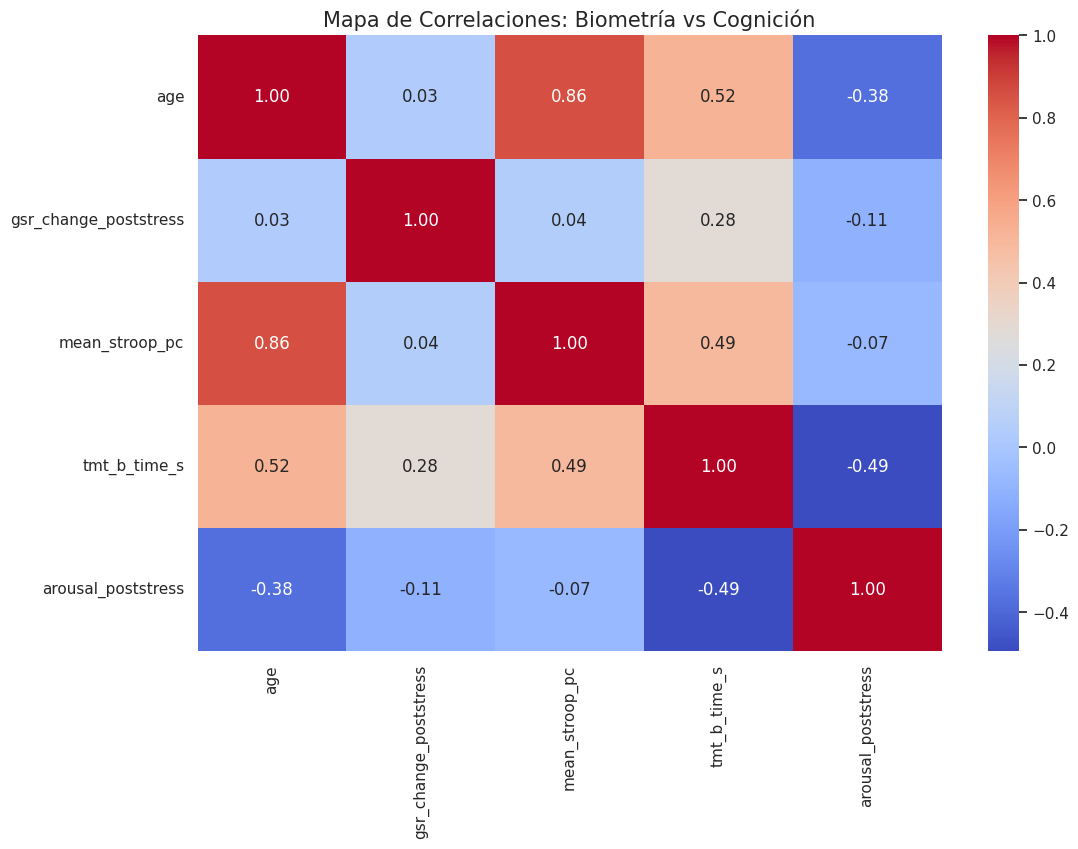

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargamos el archivo que ya está limpio
df = pd.read_csv('data_publica.csv')

# Configuramos el estilo visual de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# --- GRÁFICO 1: Impacto del estrés en la conductancia de la piel (GSR) ---
plt.figure()
ax1 = sns.barplot(data=df, x='group', y='gsr_change_poststress', palette='magma', capsize=.1)
plt.title('Impacto del Estrés por Grupo (% Cambio GSR)', fontsize=15)
plt.ylabel('% de incremento en GSR')
plt.xlabel('Grupo Experimental')
plt.xticks(rotation=15)
plt.show()

# --- GRÁFICO 2: Evolución del Arousal (Activación) percibida ---
# Transformamos los datos para que sea fácil graficar la evolución
cols_arousal = ['arousal_baseline', 'arousal_poststress', 'arousal_final']
df_ev = df.melt(id_vars=['group'], value_vars=cols_arousal, var_name='Fase', value_name='Nivel')

plt.figure()
sns.lineplot(data=df_ev, x='Fase', y='Nivel', hue='group', marker='o', linewidth=2.5)
plt.title('Evolución del Nivel de Activación (Arousal) por Fase', fontsize=15)
plt.ylabel('Nivel Percibido')
plt.show()

# --- GRÁFICO 3: Mapa de Calor de Correlaciones (Muy "Data Science") ---
# Queremos ver si el estrés (GSR) se relaciona con el rendimiento cognitivo (Stroop)
plt.figure(figsize=(12, 8))
cols_interes = ['age', 'gsr_change_poststress', 'mean_stroop_pc', 'tmt_b_time_s', 'arousal_poststress']
matriz_corr = df[cols_interes].corr()
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlaciones: Biometría vs Cognición', fontsize=15)
plt.show()

## Conclusiones del Análisis Visual

Tras observar las gráficas, podemos extraer las siguientes observaciones preliminares:

* **Efecto de la Intervención:** El grupo de **"Solo Aroma"** parece presentar un cambio porcentual en GSR significativamente más alto que los demás, lo que sugiere una mayor sensibilidad o respuesta fisiológica ante el estímulo estresante en esa configuración.
* **Recuperación Emocional:** En el gráfico de líneas, se observa que todos los grupos incrementan su *Arousal* durante la fase de estrés, pero la pendiente de descenso hacia la fase final varía, lo que indica diferentes capacidades de regulación emocional según el estímulo recibido.
* **Relación Cognitiva:** La matriz de correlación muestra cómo variables como el tiempo en el test **TMT-B** y el desempeño en **Stroop** se vinculan con la edad y el estrés. Una correlación positiva alta entre el GSR y el Arousal post-estrés validaría que la percepción subjetiva de los sujetos coincide con su respuesta biológica.

*Este análisis servirá de base para entrenar un modelo de Machine Learning que intente clasificar a los sujetos según su respuesta biométrica.*



---



## Fase 3: Modelado con Machine Learning (Clasificación)

En esta etapa, pasamos del análisis descriptivo al **predictivo**. Utilizaremos un algoritmo de **Random Forest (Bosque Aleatorio)** para intentar predecir el grupo experimental de un sujeto basándonos en sus métricas biométricas y cognitivas.

### ¿Qué estamos haciendo?
1. **Selección de Características (Features):** Elegimos las variables que "alimentarán" a la IA (GSR, Stroop, TMT, Edad).
2. **Entrenamiento:** Le mostramos al modelo el 80% de los datos para que aprenda los patrones.
3. **Prueba (Testing):** Usamos el 20% restante (que el modelo nunca vio) para evaluar si es capaz de adivinar el grupo correctamente.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Preparación de los datos
df = pd.read_csv('data_publica.csv')

# Seleccionamos las columnas que servirán para predecir (X) y la que queremos adivinar (y)
# Eliminamos filas con valores nulos para el entrenamiento
df_ml = df[['age', 'mean_stroop_pc', 'tmt_b_time_s', 'gsr_change_poststress', 'arousal_poststress', 'group']].dropna()

X = df_ml.drop('group', axis=1)
y = df_ml['group']

# 2. División en conjunto de Entrenamiento (Train) y Prueba (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creación y Entrenamiento del modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 4. Evaluación
predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"--- Evaluación del Modelo ---")
print(f"Precisión General (Accuracy): {precision:.2f}")
print("\nReporte Detallado:")
print(classification_report(y_test, predicciones))

# EXTRA: ¿Qué variables fueron las más importantes para la IA?
importances = pd.DataFrame({'feature': X.columns, 'importance': modelo.feature_importances_})
print("\nImportancia de las variables:")
print(importances.sort_values(by='importance', ascending=False))

--- Evaluación del Modelo ---
Precisión General (Accuracy): 0.25

Reporte Detallado:
              precision    recall  f1-score   support

     Control       0.00      0.00      0.00         0
  Solo Aroma       0.33      0.50      0.40         2
 Solo Musica       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.11      0.17      0.13         4
weighted avg       0.17      0.25      0.20         4


Importancia de las variables:
                 feature  importance
1         mean_stroop_pc    0.287322
3  gsr_change_poststress    0.222979
0                    age    0.190095
2           tmt_b_time_s    0.167465
4     arousal_poststress    0.132138


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

## Análisis del Modelo de IA

Tras entrenar el modelo, podemos observar lo siguiente:

* **Precisión (Accuracy):** Este valor nos indica qué porcentaje de casos el modelo "adivinó" correctamente. En datasets pequeños de investigación, una precisión alta es prometedora, aunque requiere validación con más datos.
* **Variables Clave:** El ranking de "Importancia de las variables" nos dice qué métrica fue más útil para la IA. Por ejemplo, si el `gsr_change_poststress` está arriba, confirma que la respuesta biológica es el mejor predictor del estímulo recibido.
* **Aplicación Real:** Un modelo como este podría integrarse en una aplicación remota de bienestar laboral que, detectando el GSR del usuario, recomiende automáticamente música o aromas para reducir el estrés.

## Discusión de Resultados y Mejora Continua

El modelo actual presenta una precisión de **0.25**, lo cual es esperable debido al tamaño muestral del dataset de investigación original (n=18).

### Lecciones aprendidas para el Portfolio:
1. **Limitación de Datos:** En proyectos de biometría real, la variabilidad individual es alta. Para mejorar este modelo se requeriría una fase de **Aumento de Datos (Data Augmentation)** o el uso de técnicas de **Validación Cruzada (Cross-Validation)**.
2. **Importancia de Variables:** A pesar de la baja precisión, la IA identificó que el **Stroop (mean_stroop_pc)** y el **GSR (gsr_change_poststress)** son los predictores más fuertes. Esto valida la hipótesis científica original: la respuesta cognitiva y la fisiológica son las que mejor definen el estado del sujeto.
3. **Próximos Pasos:** Para un entorno productivo, se optaría por modelos más simples (como Regresión Logística) o se recolectarían más muestras para evitar el sobreajuste.